In [1]:
import pickle
import spacy
import scattertext as st
import re

import matplotlib.pyplot as plt

import spacy
#from spacy import displacy
#from spacy.symbols import amod
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem import WordNetLemmatizer

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

import pyLDAvis
import pyLDAvis.sklearn

import pandas as pd
import numpy as np

import swat
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
#nltk.download()
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

import warnings
warnings.filterwarnings("ignore")


Bad key "text.kerning_factor" on line 4 in
/Users/elena/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def display_topics(model, feature_names, no_top_words, model_type = 'lsa_nmf_lda', topic_names=None):
    if model_type == 'lsa_nmf_lda':
        for ix, topic in enumerate(model.components_):
            if not topic_names or not topic_names[ix]:
                print("\nTopic ", ix)
            else:
                print("\nTopic: '",topic_names[ix],"'")
            print(", ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]]))
    elif model_type == 'corex':
        for ix, topic in enumerate(model.alpha):
            if not topic_names or not topic_names[ix]:
                print("\nTopic ", ix)
            else:
                print("\nTopic: '",topic_names[ix],"'")
            print(", ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]]))
    else:
        raise ValueError('Unknown model type')

# Text Preprocessing
## Skip this step to save time; there is an option to read a pickle file to get the result of this block.

In [14]:
with open('../../data/blogger_com_data_19320_&_clean.pkl', 'rb') as picklefile:
    df = pickle.load(picklefile)

In [30]:
df.head()

,blogger_id,gender,age,occupation,name,post,len_post
0,1000331,female,37,indUnk,Leo,my four year old never stops talking she ll...,4583
1,1000866,female,17,Student,Libra,yes i say goodbye friends hour ago and yes...,335483
2,1004904,male,23,Arts,Capricorn,wants i go i always i choice i cant make choic...,677
3,1005076,female,25,Arts,Cancer,the following things last night roxass ...,15222
4,1005545,male,25,Engineering,Sagittarius,blogdex blogdex research project mit media lab...,52454


In [14]:
df.shape

(19320, 7)

In [21]:
df_toy=df.loc[:19321,:]

In [19]:
df_toy['post1'] = df_toy['post'].apply(lambda x: x[:5000])

In [22]:
stop_words = set(stopwords.words('english'))

def remove_stop_words(comment_line):
    token_words=word_tokenize(str(comment_line))
    filtered_comment_line = [w for w in token_words if not w in stop_words] 
    
    return " ".join(filtered_comment_line)

In [23]:
alphanumeric = lambda x: re.sub(r'\b[0-9]+\b\W*', '', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
#re.sub(r'\b[0-9]+\b\W*', '', text)

In [41]:
alphanumeric2 = lambda x: re.sub(r'\b[0-9]+[a-z]+\b\W*', '', x)
alphanumeric3 = lambda x: re.sub('z+', '', x)

In [43]:
df_toy['post'] = df_toy['post'].map(alphanumeric2).map(alphanumeric3)

In [24]:
lemmatizer = WordNetLemmatizer()
def lemma_series(string):
    return lemmatizer.lemmatize(string)
#lemma_series('wives')

In [27]:
df_toy['post'] = df_toy['post'].map(remove_stop_words).map(alphanumeric).map(punc_lower)

In [28]:
df_toy['post'] = df_toy['post'].map(lemma_series)

In [44]:
with open('../../data/blogger_com_data_19320_&_clean_lemma1.pkl', 'wb') as picklefile:
    pickle.dump(df, picklefile)

In [32]:
#iterate from here to custom stopwords
my_stop_words_lst = ['ur', 'hey', 'll','ca', 'la', '[detail]', 'so', 's', 'it', 'he', 
                     'its', 'she', 'we', 'n', 'm', 've', 'things', 'really', 'say', 
                     'im', 'dont', 'thats', 'ive', 'didnt', 'hes', 'doesnt', 'havent', 
                     'like', 'wont', 'na', 'shes', 'wasnt','den', 'haha', 'dun', 'haiz', 
                     'tt', 'mi', 'tat', 'juz', 'wif', 'wat', 'le', 'liao', 'com', 'www', 
                     'got', 'na', 'yeah', 'gon', 'today',  'oh', 'cuz', 'ko', 'sa', 'ng', 
                     'na', 'ako', 'ang', 'mga', 'pa', 'yung',  'pero', 'ka','http','ur',
                     'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 
                     'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 
                     'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 
                     'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz']

for w in my_stop_words_lst:
    pattern = r'\b'+w+r'\b'
    custom_stop = lambda x: re.sub(pattern, ' ', x)
    df_toy['post'] = df_toy['post'].map(custom_stop)

In [33]:
with open('../../data/blogger_com_data_19320_&_clean_lemma1.pkl', 'wb') as picklefile:
    pickle.dump(df, picklefile)

# Text EDA
## Start here for EDA

In [7]:
with open('../../data/blogger_com_data_19320_&_clean_lemma1.pkl', 'rb') as picklefile:
    df = pickle.load(picklefile)

In [18]:
df.head()

,blogger_id,gender,age,occupation,name,post,len_post
0,1000331,female,37,indUnk,Leo,my four year old never stops talking ll ...,4583
1,1000866,female,17,Student,Libra,yes goodbye friends hour ago and yes ...,335483
2,1004904,male,23,Arts,Capricorn,wants go always choice cant make choic...,677
3,1005076,female,25,Arts,Cancer,the following last night roxass the ...,15222
4,1005545,male,25,Engineering,Sagittarius,blogdex blogdex research project mit media lab...,52454


# Scattertext
Gender-based EDA

In [14]:
#!danger, computationally heavy 
corpus = st.CorpusFromPandas(df,
                              category_col='gender',
                              text_col='post',
                              nlp=st.whitespace_nlp_with_sentences
                             ).build()
html1 = st.produce_scattertext_explorer(
     corpus,
     category='male',
     category_name='Male',
     not_category_name='Female',
     minimum_term_frequency=5,
     pmi_threshold_coefficient=4,
     width_in_pixels=1000,
     #metadata=df1['prime_tag']
     metadata=corpus.get_df()['occupation']
     )

In [ ]:
open('demo_gender_06_08_2020.html', 'wb').write(html1.encode('utf-8'));

# LDA Pyviz

In [10]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=1000,                # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(df.post)

In [11]:
n_components = 7

lda_model = LatentDirichletAllocation(n_components=n_components,   # Number of topics
                                      max_iter=10,                 # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,            # Random state
                                      #batch_size=128,             # n docs in each learning iter
                                      n_jobs = -1,                 # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [12]:
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)
panel

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.024662  0.053168       1        1  20.760985
0     -0.046474 -0.056614       2        1  18.182951
4      0.044440 -0.115890       3        1  14.501084
3     -0.005118 -0.005758       4        1  14.116754
6      0.158560  0.027554       5        1  12.844938
1      0.028142  0.079437       6        1   9.825257
5     -0.154887  0.018102       7        1   9.768030, topic_info=      Term           Freq          Total Category  logprob  loglift
963   went  122106.000000  122106.000000  Default  30.0000  30.0000
502    lol   36056.000000   36056.000000  Default  29.0000  29.0000
515   love  116399.000000  116399.000000  Default  28.0000  28.0000
486   life  104597.000000  104597.000000  Default  27.0000  27.0000
345    god   54786.000000   54786.000000  Default  26.0000  26.0000
..     ...            ...            ...      ...      ...      ...
74    blog    8602.384625   49364.644413   Topic7  -5.2548   0.5789
532    man    8655.083714   54829.460459   Topic7  -5.2487   0.4800
48     bad    8660.334577   56748.265112   Topic7  -5.2481   0.4462
373  happy    8448.900536   43998.839015   Topic7  -5.2728   0.6759
503   long    8293.764276   66307.795763   Topic7  -5.2914   0.2473

[437 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2         1  0.078370  according
2         2  0.025652  according
2         3  0.048649  according
2         4  0.090223  according
2         5  0.666232  according
...     ...       ...        ...
997       3  0.045564  yesterday
997       4  0.042312  yesterday
997       5  0.027020  yesterday
997       6  0.045533  yesterday
997       7  0.219753  yesterday

[2143 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 5, 4, 7, 2, 6])

# Topic Modeling

In [3]:
with open('../../data/blogger_com_data_19320_&_clean_lemma1.pkl', 'rb') as picklefile:
    df = pickle.load(picklefile)

In [4]:
df_toy = df

In [5]:
vectorizer_TF_IDF = TfidfVectorizer(stop_words='english', max_df=1.0, min_df=2, strip_accents='ascii') 
doc_word_TF_IDF = vectorizer_TF_IDF.fit_transform(list(df_toy.post))
pd.DataFrame(doc_word_TF_IDF.toarray(), columns=vectorizer_TF_IDF.get_feature_names()).shape

(19320, 181141)

In [6]:
dtm_TF_IDF = pd.DataFrame(doc_word_TF_IDF.toarray(), index=df_toy['blogger_id'], columns=vectorizer_TF_IDF.get_feature_names())
words_TF_IDF = list(np.asarray(vectorizer_TF_IDF.get_feature_names()))

In [7]:
nmf_model = NMF(7)
doc_topic = nmf_model.fit_transform(doc_word_TF_IDF)
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2", "component_3","component_4", "component_5",
                     "component_6","component_7"],
             columns = vectorizer_TF_IDF.get_feature_names())
#topic_word

In [8]:
display_topics(nmf_model, vectorizer_TF_IDF.get_feature_names(), 16)


Topic  0
went, going, day, night, home, time, work, good, house, week, little, fun, weekend, ll, morning, pretty

Topic  1
lol, went, ya, fun, yea, ok, anyways, school, hey, know, kinda, good, cool, stuff, soo, ill

Topic  2
know, love, want, life, think, feel, people, time, ca, way, friends, make, person, going, right, need

Topic  3
lor, wad, cos, wan, abt, noe, sch, ppl, la, went, dunno, jus, sian, sia, dat, oso

Topic  4
bush, kerry, iraq, war, president, people, government, american, america, country, john, vote, said, political, election, states

Topic  5
god, church, jesus, life, lord, christ, faith, pray, christian, love, bible, prayer, worship, time, heart, people

Topic  6
blog, people, new, time, post, ll, good, site, work, read, book, make, use, think, game, music


In [9]:
doc_topic_nmf = pd.DataFrame(doc_topic.round(5),
                             index=df_toy['blogger_id'],
                             columns = ["Days of my Life" ,"Teen Spirit", "Relationships", "Slang People", "Politics",
                                        "Faith", "Leisure"])
doc_topic_nmf

,Days of my Life,Teen Spirit,Relationships,Slang People,Politics,Faith,Leasure
blogger_id,,,,,,,
1000331,0.03979,0.00000,0.01463,0.00000,0.00037,0.00146,0.03592
1000866,0.09392,0.03847,0.07721,0.00168,0.00000,0.00000,0.01042
1004904,0.00000,0.00000,0.02198,0.00000,0.00320,0.00234,0.00000
1005076,0.04418,0.00907,0.02103,0.00000,0.00355,0.00523,0.01281
1005545,0.00000,0.00000,0.00000,0.00000,0.01479,0.00000,0.11178
...,...,...,...,...,...,...,...
996147,0.07345,0.00000,0.01294,0.00079,0.00000,0.00000,0.05504
997488,0.00000,0.00000,0.05996,0.00000,0.00000,0.00546,0.00557
998237,0.02532,0.08137,0.04830,0.01486,0.00379,0.00000,0.00000


In [10]:
doc_topic_nmf['Prime Topic'] = doc_topic_nmf.idxmax(axis=1)

In [11]:
doc_topic_nmf

,Days of my Life,Teen Spirit,Relationships,Slang People,Politics,Faith,Leasure,Prime Topic
blogger_id,,,,,,,,
1000331,0.03979,0.00000,0.01463,0.00000,0.00037,0.00146,0.03592,Days of my Life
1000866,0.09392,0.03847,0.07721,0.00168,0.00000,0.00000,0.01042,Days of my Life
1004904,0.00000,0.00000,0.02198,0.00000,0.00320,0.00234,0.00000,Relationships
1005076,0.04418,0.00907,0.02103,0.00000,0.00355,0.00523,0.01281,Days of my Life
1005545,0.00000,0.00000,0.00000,0.00000,0.01479,0.00000,0.11178,Leasure
...,...,...,...,...,...,...,...,...
996147,0.07345,0.00000,0.01294,0.00079,0.00000,0.00000,0.05504,Days of my Life
997488,0.00000,0.00000,0.05996,0.00000,0.00000,0.00546,0.00557,Relationships
998237,0.02532,0.08137,0.04830,0.01486,0.00379,0.00000,0.00000,Teen Spirit


In [22]:
# cosine_similarity((doc_topic_nmf.values[0], 
#                    doc_topic_nmf.values[1], 
#                    doc_topic_nmf.values[3],  
#                    doc_topic_nmf.values[4], 
#                    doc_topic_nmf.values[5], 
#                    doc_topic_nmf.values[6]))

In [32]:
pairwise_distances(doc_topic[0].reshape(1, -1),doc_topic,metric='cosine').argsort()

array([[    0,  3383, 15230, ...,  5752,  1676,  2732]])

In [16]:
doc_topic_nmf_rich = pd.merge(doc_topic_nmf, df,  how='left', left_on='blogger_id', right_on = 'blogger_id')

In [12]:
tsne3 = TSNE(n_components=3)
tsne3_features = tsne3.fit_transform(doc_topic_nmf.iloc[:, :7])

In [17]:
xs3 = tsne3_features[:, 0]
ys3 = tsne3_features[:, 1]
zs3 = tsne3_features[:, 2]

In [18]:
doc_topic_nmf_rich['xs'] = xs3
doc_topic_nmf_rich['ys'] = ys3
doc_topic_nmf_rich['zs'] = zs3

In [19]:
tsne_3d = doc_topic_nmf_rich[['blogger_id', 'Prime Topic', 'gender', 'age',
       'occupation', 'name', 'xs', 'ys', 'zs']]
tsne_3d

,blogger_id,Prime Topic,gender,age,occupation,name,xs,ys,zs
0,1000331,Days of my Life,female,37,indUnk,Leo,9.145916,9.738914,-3.360995
1,1000866,Days of my Life,female,17,Student,Libra,-3.855926,6.046159,-17.427626
2,1004904,Relationships,male,23,Arts,Capricorn,-7.201592,-11.541499,13.179256
3,1005076,Days of my Life,female,25,Arts,Cancer,-4.352797,12.333635,-3.938467
4,1005545,Leasure,male,25,Engineering,Sagittarius,19.533613,-9.928012,-8.008976
...,...,...,...,...,...,...,...,...,...
19315,996147,Days of my Life,female,36,Telecommunications,Leo,10.253700,10.715655,-11.641657
19316,997488,Relationships,male,25,indUnk,Cancer,-6.805514,-11.120411,-7.449618
19317,998237,Teen Spirit,female,16,indUnk,Virgo,-17.006491,3.811110,-10.347041
19318,998966,Teen Spirit,male,27,indUnk,Taurus,-13.249537,7.473954,4.173434


In [13]:
with open('../../data/blogger_com_data_19320_tsne3d.pkl', 'wb') as picklefile:
    pickle.dump(tsne_3d, picklefile)

In [14]:
with open('../../data/blogger_com_data_19320_tsne3d.pkl', 'rb') as picklefile:
    _3d = pickle.load(picklefile)

In [36]:
tsne2 = TSNE(n_components=2)
tsne2_features = tsne2.fit_transform(doc_topic_nmf.iloc[:, :7])

In [42]:
xs2 = tsne2_features[:, 0]
ys2 = tsne2_features[:, 1]

In [44]:
doc_topic_nmf_rich['xs'] = xs2
doc_topic_nmf_rich['ys'] = ys2

In [58]:
tsne_2d = doc_topic_nmf_rich[['blogger_id', 'Prime Topic', 'gender', 'age',
       'occupation', 'name', 'xs', 'ys']]
tsne_2d

,blogger_id,Prime Topic,gender,age,occupation,name,xs,ys
0,1000331,Days of my Life,female,37,indUnk,Leo,-4.964208,12.827444
1,1000866,Days of my Life,female,17,Student,Libra,12.908379,12.557416
2,1004904,Relationships,male,23,Arts,Capricorn,-2.090839,-14.327253
3,1005076,Days of my Life,female,25,Arts,Cancer,1.731561,6.401044
4,1005545,Leasure,male,25,Engineering,Sagittarius,-4.709866,16.518551
...,...,...,...,...,...,...,...,...
19315,996147,Days of my Life,female,36,Telecommunications,Leo,0.573850,18.167971
19316,997488,Relationships,male,25,indUnk,Cancer,11.695521,-5.213975
19317,998237,Teen Spirit,female,16,indUnk,Virgo,15.261829,-2.618830
19318,998966,Teen Spirit,male,27,indUnk,Taurus,0.753060,-6.764017


In [20]:
with open('../../data/blogger_com_data_19320_tsne2d.pkl', 'wb') as picklefile:
    pickle.dump(tsne_2d, picklefile)

In [23]:
with open('../../data/blogger_com_data_19320_tsne2d.pkl','rb') as file:
    tsne_2d = pickle.load(file)

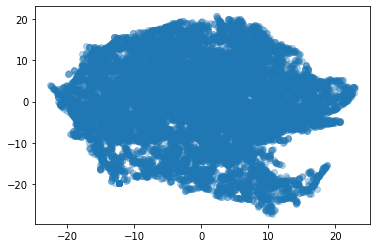

In [27]:
plt.scatter(tsne_2d['xs'], tsne_2d['ys'], alpha=0.3);

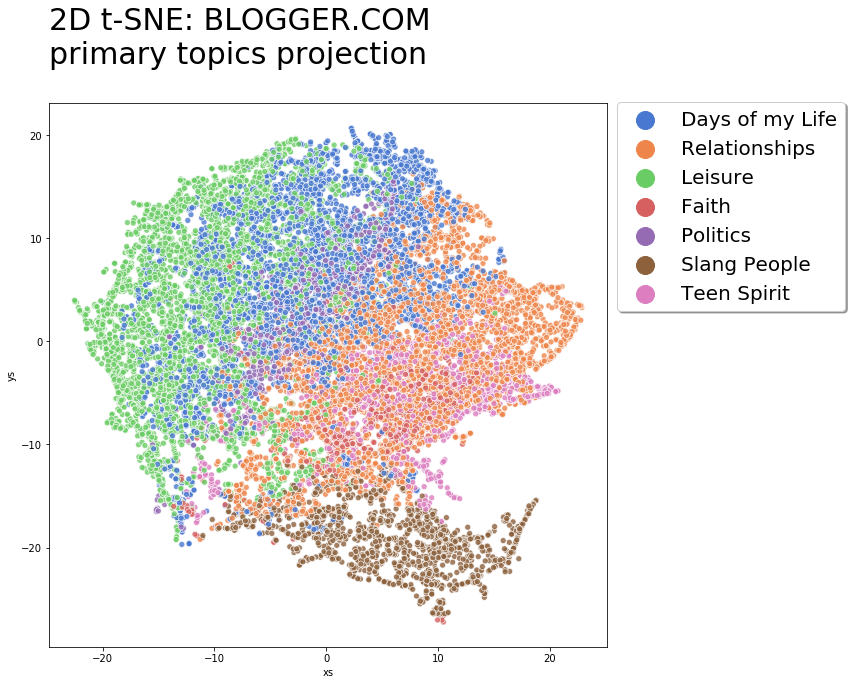

In [25]:
plt.figure(figsize=(10,10))
g = sns.scatterplot(
    x='xs', y='ys',
    hue='Prime Topic',
    palette=sns.color_palette("muted", 7),
    data=tsne_2d,
    #markers=markers,
    legend="full",
    alpha=0.8)
h,l = g.get_legend_handles_labels()
g.legend(h[1:], l[1:], loc='center left', bbox_to_anchor=(1, 0.81), ncol=1, fontsize=20, markerscale=3, title=False, fancybox=True, shadow=True)
g.set_title('2D t-SNE: BLOGGER.COM \nprimary topics projection',fontsize=30, loc='left', pad=40);

In [135]:
h,l

([<matplotlib.collections.PathCollection at 0x7fd89f3fb890>,
 ['Prime Topic',
  'Days of my Life',
  'Relationships',
  'Leasure',
  'Faith',
  'Politics',
  'Slang People',
  'Teen Spirit'])

In [110]:
male = tsne_2d[tsne_2d['gender'] == 'male']

In [111]:
female = tsne_2d[tsne_2d['gender'] == 'female']

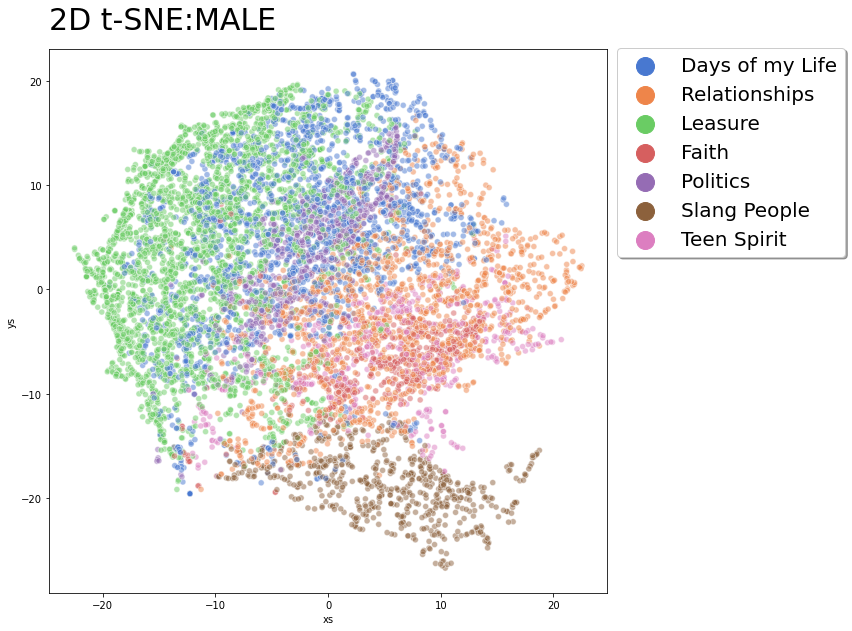

In [139]:
plt.figure(figsize=(10,10))
g = sns.scatterplot(
    x='xs', y='ys',
    hue='Prime Topic',
    palette=sns.color_palette("muted", 7),
    hue_order = [
  'Days of my Life',
  'Relationships',
  'Leasure',
  'Faith',
  'Politics',
  'Slang People',
  'Teen Spirit'],
    data=male,
    #markers=markers,
    legend="full",
    alpha=0.5)
h,l = g.get_legend_handles_labels()
g.legend(h[1:], l[1:], loc='center left', bbox_to_anchor=(1, 0.81), ncol=1, fontsize=20, markerscale=3, title=False, 
         fancybox=True, shadow=True, )
g.set_title('2D t-SNE:MALE',fontsize=30, loc='left', pad=20);

2D view is limited, clouds of topics overlap. Therefore, I use 3D visulaisation for commulity exploration in the web application.